In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv('EDA02titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [3]:
slice_titanic = titanic.iloc[:10,[2,3]]
slice_titanic

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


# Group By

In [4]:
group_obj = slice_titanic.groupby('sex')

In [5]:
type(group_obj)

pandas.core.groupby.generic.DataFrameGroupBy

In [6]:
group_obj.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [7]:
l=list(group_obj)
l

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [8]:
len(l)

2

# Accessing the groupby tuple

In [9]:
l[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [10]:
l[0][0]

'female'

In [11]:
l[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

# Another way to access groupby

In [12]:
slice_female = slice_titanic.loc[slice_titanic.sex == 'female']
slice_titanic

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


# Comparing the ouput

In [13]:
slice_female.equals(l[0][1])

True

# Displaying the df

In [14]:
for element in group_obj:
    print(element)

('female',       sex   age
1  female  38.0
2  female  26.0
3  female  35.0
8  female  27.0
9  female  14.0)
('male',     sex   age
0  male  22.0
4  male  35.0
5  male   NaN
6  male  54.0
7  male   2.0)


In [15]:
summer = pd.read_csv('EDA02summer.csv')
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [16]:
summer.Country.nunique()

147

In [17]:
summer1 = summer.groupby('Country')

In [18]:
l = list(summer1)
l

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [19]:
len(l)

147

In [20]:
l[109][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21303,1996,Atlanta,Aquatics,Diving,"SAUTIN, Dmitry",RUS,Men,10M Platform,Gold
21313,1996,Atlanta,Aquatics,Diving,"LASHKO, Irina",RUS,Women,3M Springboard,Silver
21326,1996,Atlanta,Aquatics,Swimming,"KULIKOV, Vladislav",RUS,Men,100M Butterfly,Bronze
21327,1996,Atlanta,Aquatics,Swimming,"PANKRATOV, Denis",RUS,Men,100M Butterfly,Gold
21333,1996,Atlanta,Aquatics,Swimming,"POPOV, Alexander",RUS,Men,100M Freestyle,Gold
...,...,...,...,...,...,...,...,...,...
31144,2012,London,Wrestling,Wrestling Freestyle,"SEMENOV, Mingiyan",RUS,Men,Wg 55 KG,Bronze
31147,2012,London,Wrestling,Wrestling Freestyle,"KURAMAGOMEDOV, Zaur",RUS,Men,Wg 60 KG,Bronze
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


# Group by 2 columns

In [21]:
summer.head(1)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold


In [22]:
summer2 = summer.groupby(by = ['Country', 'Gender'])

In [23]:
l2 = list(summer2)

In [24]:
l2

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [25]:
len(l2)

236

In [26]:
l2[104][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
21356,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Butterfly,Bronze
21369,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,200M Individual Medley,Gold
21375,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Freestyle,Gold
21381,1996,Atlanta,Aquatics,Swimming,"SMITH, Michelle Marie",IRL,Women,400M Individual Medley,Gold
23627,2000,Sydney,Athletics,Athletics,"O'SULLIVAN, Sonia",IRL,Women,5000M,Silver
29896,2012,London,Boxing,Boxing,"TAYLOR, Katie",IRL,Women,60 KG,Gold


In [27]:
l2[102]

(('IRI', 'Men'),
        Year      City          Sport           Discipline  \
 7958   1948    London  Weightlifting        Weightlifting   
 8838   1952  Helsinki  Weightlifting        Weightlifting   
 8840   1952  Helsinki  Weightlifting        Weightlifting   
 8859   1952  Helsinki      Wrestling      Wrestling Free.   
 8870   1952  Helsinki      Wrestling      Wrestling Free.   
 ...     ...       ...            ...                  ...   
 31126  2012    London      Wrestling  Wrestling Freestyle   
 31131  2012    London      Wrestling  Wrestling Freestyle   
 31141  2012    London      Wrestling  Wrestling Freestyle   
 31145  2012    London      Wrestling  Wrestling Freestyle   
 31161  2012    London      Wrestling  Wrestling Freestyle   
 
                                  Athlete Country Gender  \
 7958            SALMASSI, Jafar Mohammad     IRI    Men   
 8838                         MIRZAI, Ali     IRI    Men   
 8840                    NAMDJOU, Mahmoud     IRI    Men 

In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [29]:
slice_titanic = titanic.iloc[:10,[2,3]]
slice_titanic

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [30]:
list(slice_titanic.groupby('sex'))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


# Important of groupby

In [31]:
slice_titanic.groupby('sex').mean()

,age
sex,
female,28.00
male,28.25


In [32]:
slice_titanic.groupby('sex').sum()

,age
sex,
female,140.0
male,113.0


In [33]:
titanic.groupby('sex').sum()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,233,678,7286.00,218,204,13966.6628
male,109,1379,13919.17,248,136,14727.2865


In [34]:
titanic.groupby('sex').age.mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

In [35]:
titanic.groupby('sex')[['fare','age']].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [36]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

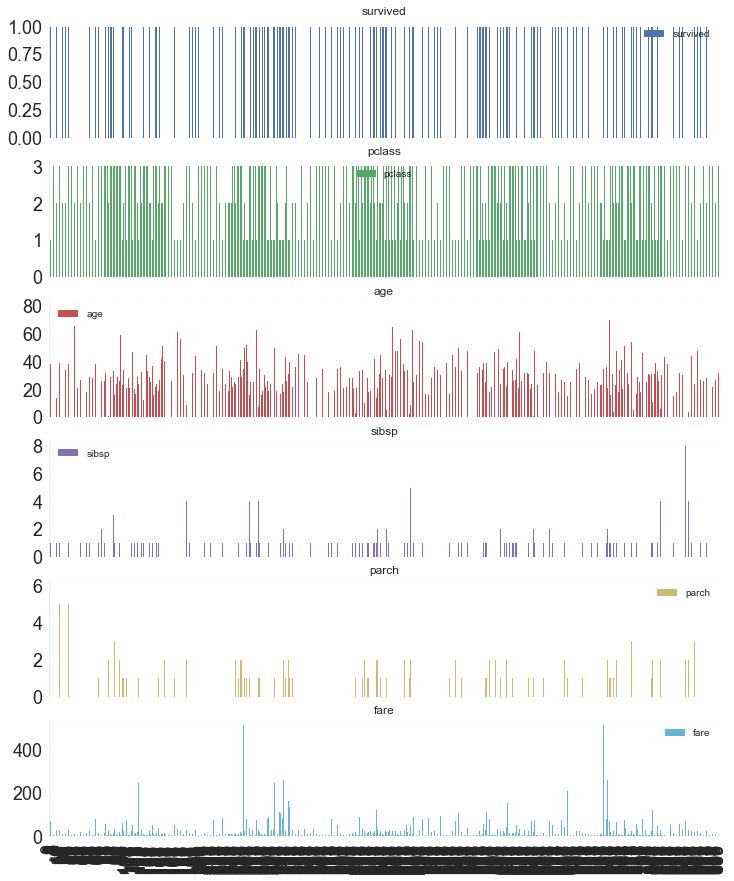

In [37]:
titanic.plot(kind = 'bar', subplots = True, figsize = (12,15), fontsize = 18)
plt.show()

In [38]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [39]:
medal_country = summer.groupby('Country').Medal.count().nlargest(n = 20)
medal_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
Name: Medal, dtype: int64

Text(0, 0.5, 'Medal')

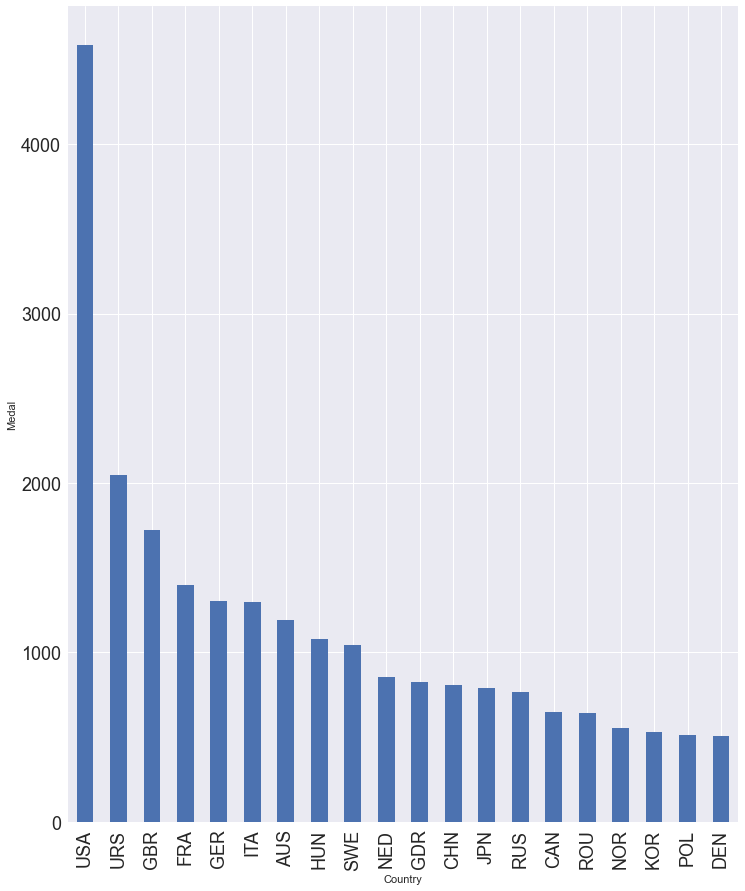

In [40]:
medal_country.plot(kind = 'bar', figsize = (12,15),fontsize = 18)
plt.xlabel('Country')
plt.ylabel('Medal')

In [41]:
medal = summer.groupby('Medal').Medal.count().nlargest(n = 20)

In [42]:
medal

Medal
Gold      10486
Bronze    10369
Silver    10310
Name: Medal, dtype: int64

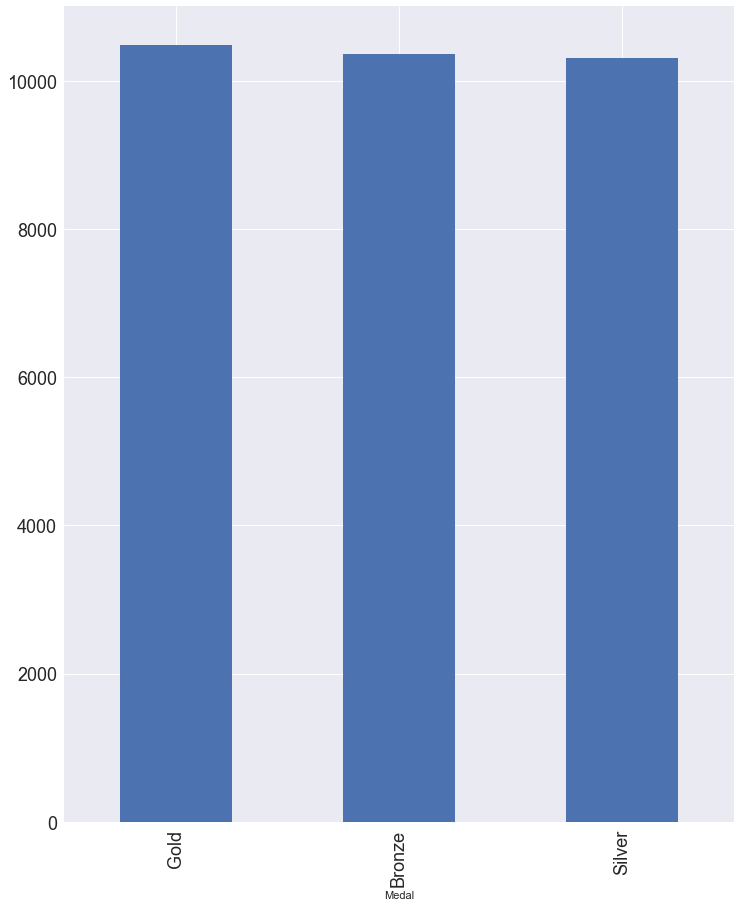

In [43]:
medal.plot(kind = 'bar', figsize = (12,15), fontsize = 18)
plt.show()

In [44]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [45]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
titanic.fare.mean()

32.204207968574636

In [47]:
titanic.groupby('pclass').fare.mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [48]:
titanic.groupby('sex').fare.mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [49]:
titanic.groupby('survived').fare.mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

In [50]:
titanic['Adult/Child'] = 'adult'

In [51]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,Adult/Child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult


In [52]:
titanic.loc[titanic.age<18, 'Adult/Child']='child'

In [53]:
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,Adult/Child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
5,0,3,male,NaN,0,0,8.4583,Q,NaN,adult
6,0,1,male,54.0,0,0,51.8625,S,E,adult
7,0,3,male,2.0,3,1,21.0750,S,NaN,child
8,1,3,female,27.0,0,2,11.1333,S,NaN,adult
9,1,2,female,14.0,1,0,30.0708,C,NaN,child


In [54]:
titanic['Adult/Child'].value_counts()

adult    778
child    113
Name: Adult/Child, dtype: int64

In [55]:
titanic.groupby('Adult/Child').survived.mean()*100

Adult/Child
adult    36.118252
child    53.982301
Name: survived, dtype: float64

In [56]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [57]:
titanic.groupby(['sex','Adult/Child']).count()

survived  pclass  age  sibsp  parch  fare  embarked  deck
sex    Adult/Child                                                           
female adult             259     259  206    259    259   259       257    86
       child              55      55   55     55     55    55        55    11
male   adult             519     519  395    519    519   519       519    98
       child              58      58   58     58     58    58        58     8

In [58]:
titanic.groupby(['sex','Adult/Child']).survived.mean()*100

sex     Adult/Child
female  adult          75.289575
        child          69.090909
male    adult          16.570328
        child          39.655172
Name: survived, dtype: float64

In [59]:
woman_child = titanic.groupby(['sex','Adult/Child']).survived.mean().sort_values(ascending=False)

In [60]:
woman_child

sex     Adult/Child
female  adult          0.752896
        child          0.690909
male    child          0.396552
        adult          0.165703
Name: survived, dtype: float64

<AxesSubplot:xlabel='sex,Adult/Child'>

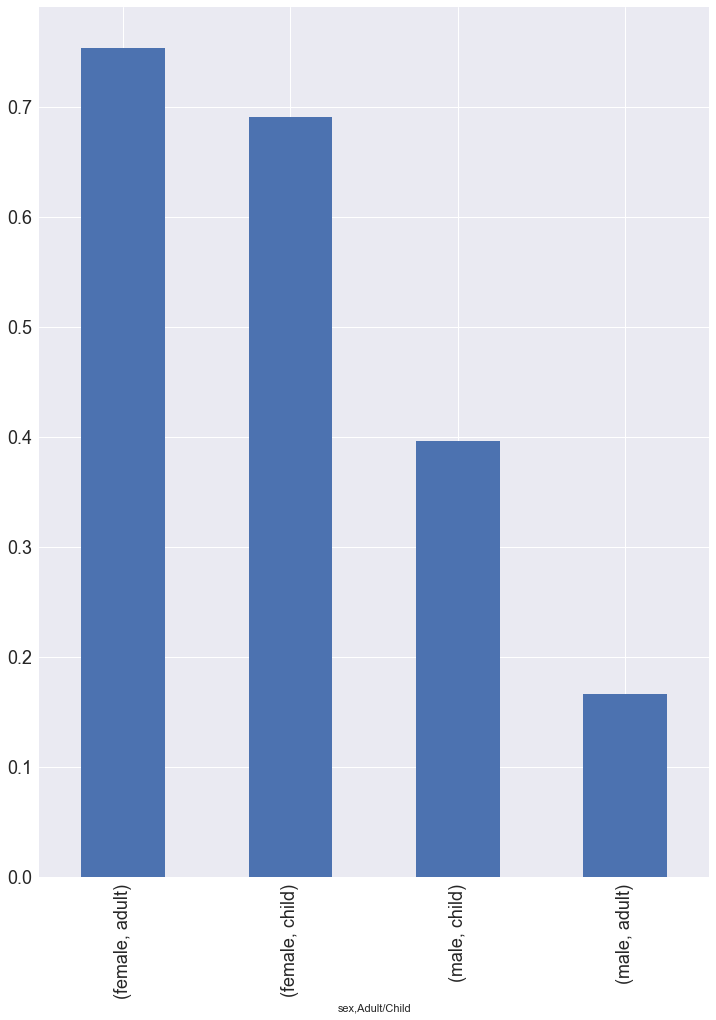

In [61]:
woman_child.plot(kind = 'bar', figsize = (12, 16), fontsize = 18)

# EDA07

In [62]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,Adult/Child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,adult
887,1,1,female,19.0,0,0,30.0000,S,B,adult
888,0,3,female,NaN,1,2,23.4500,S,NaN,adult
889,1,1,male,26.0,0,0,30.0000,C,C,adult


In [63]:
# does not carry any major information
titanic.groupby('sex').agg(['mean','sum','min','max'])

survived                 pclass                      age            \
            mean  sum min max      mean   sum min max       mean       sum   
sex                                                                          
female  0.742038  233   0   1  2.159236   678   1   3  27.915709   7286.00   
male    0.188908  109   0   1  2.389948  1379   1   3  30.726645  13919.17   

        ... sibsp         parch                    fare                    \
        ...   min max      mean  sum min max       mean         sum   min   
sex     ...                                                                 
female  ...     0   8  0.649682  204   0   6  44.479818  13966.6628  6.75   
male    ...     0   8  0.235702  136   0   5  25.523893  14727.2865  0.00   

                  
             max  
sex               
female  512.3292  
male    512.3292  

[2 rows x 24 columns]

In [64]:
titanic.groupby('sex').agg({'survived':['sum','mean'],'pclass':'mean','age':['mean','median'],'fare':'max'})

survived              pclass        age             fare
            sum      mean      mean       mean median       max
sex                                                            
female      233  0.742038  2.159236  27.915709   27.0  512.3292
male        109  0.188908  2.389948  30.726645   29.0  512.3292

# Transform

In [65]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,Adult/Child
0,0,3,male,22.0,1,0,7.2500,S,NaN,adult
1,1,1,female,38.0,1,0,71.2833,C,C,adult
2,1,3,female,26.0,0,0,7.9250,S,NaN,adult
3,1,1,female,35.0,1,0,53.1000,S,C,adult
4,0,3,male,35.0,0,0,8.0500,S,NaN,adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN,adult
887,1,1,female,19.0,0,0,30.0000,S,B,adult
888,0,3,female,NaN,1,2,23.4500,S,NaN,adult
889,1,1,male,26.0,0,0,30.0000,C,C,adult


In [66]:
titanic.drop(labels = 'Adult/Child', axis='columns', inplace = True)

In [67]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [68]:
titanic.groupby(['sex','pclass']).survived.mean()

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [69]:
#transer data into series
titanic.groupby(['sex','pclass']).survived.transform('mean')

0      0.135447
1      0.968085
2      0.500000
3      0.968085
4      0.135447
         ...   
886    0.157407
887    0.968085
888    0.500000
889    0.368852
890    0.135447
Name: survived, Length: 891, dtype: float64

In [70]:
titanic['pclass_sur_rate'] = titanic.groupby(['sex','pclass']).survived.transform('mean')

In [71]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,pclass_sur_rate
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447


In [72]:
 titanic['Outlier'] = abs(titanic.survived - titanic.pclass_sur_rate)

In [73]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,pclass_sur_rate,Outlier
0,0,3,male,22.0,1,0,7.2500,S,NaN,0.135447,0.135447
1,1,1,female,38.0,1,0,71.2833,C,C,0.968085,0.031915
2,1,3,female,26.0,0,0,7.9250,S,NaN,0.500000,0.500000
3,1,1,female,35.0,1,0,53.1000,S,C,0.968085,0.031915
4,0,3,male,35.0,0,0,8.0500,S,NaN,0.135447,0.135447


In [74]:
titanic[titanic.Outlier > 0.85]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,pclass_sur_rate,Outlier
36,1,3,male,NaN,0,0,7.2292,C,NaN,0.135447,0.864553
41,0,2,female,27.00,1,0,21.0000,S,NaN,0.921053,0.921053
65,1,3,male,NaN,1,1,15.2458,C,NaN,0.135447,0.864553
74,1,3,male,32.00,0,0,56.4958,S,NaN,0.135447,0.864553
81,1,3,male,29.00,0,0,9.5000,S,NaN,0.135447,0.864553
107,1,3,male,NaN,0,0,7.7750,S,NaN,0.135447,0.864553
125,1,3,male,12.00,1,0,11.2417,C,NaN,0.135447,0.864553
127,1,3,male,24.00,0,0,7.1417,S,NaN,0.135447,0.864553
146,1,3,male,27.00,0,0,7.7958,S,NaN,0.135447,0.864553
165,1,3,male,9.00,0,2,20.5250,S,NaN,0.135447,0.864553


In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   survived         891 non-null    int64  
 1   pclass           891 non-null    int64  
 2   sex              891 non-null    object 
 3   age              714 non-null    float64
 4   sibsp            891 non-null    int64  
 5   parch            891 non-null    int64  
 6   fare             891 non-null    float64
 7   embarked         889 non-null    object 
 8   deck             203 non-null    object 
 9   pclass_sur_rate  891 non-null    float64
 10  Outlier          891 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 76.7+ KB


# Missing value

In [76]:

titanic.isna().sum()

survived             0
pclass               0
sex                  0
age                177
sibsp                0
parch                0
fare                 0
embarked             2
deck               688
pclass_sur_rate      0
Outlier              0
dtype: int64

In [77]:
mean_age = titanic.age.mean()
mean_age

29.69911764705882

In [78]:
titanic.age.fillna(mean_age, inplace = True)

In [79]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,pclass_sur_rate,Outlier
0,0,3,male,22.000000,1,0,7.2500,S,NaN,0.135447,0.135447
1,1,1,female,38.000000,1,0,71.2833,C,C,0.968085,0.031915
2,1,3,female,26.000000,0,0,7.9250,S,NaN,0.500000,0.500000
3,1,1,female,35.000000,1,0,53.1000,S,C,0.968085,0.031915
4,0,3,male,35.000000,0,0,8.0500,S,NaN,0.135447,0.135447
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NaN,0.157407,0.157407
887,1,1,female,19.000000,0,0,30.0000,S,B,0.968085,0.031915
888,0,3,female,29.699118,1,2,23.4500,S,NaN,0.500000,0.500000
889,1,1,male,26.000000,0,0,30.0000,C,C,0.368852,0.631148


In [100]:
titanic = pd.read_csv('EDA02titanic.csv')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [81]:
titanic.groupby(['sex', 'pclass']).age.mean()

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [82]:
titanic['group_mean_age'] = titanic.groupby(['sex', 'pclass']).age.transform('mean')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.507589
5,0,3,male,NaN,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.0,0,0,51.8625,S,E,41.281386
7,0,3,male,2.0,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.0,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.0,1,0,30.0708,C,NaN,28.722973


In [83]:
titanic.age.fillna(titanic.group_mean_age, inplace = True)
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.000000,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.000000,1,0,71.2833,C,C,34.611765
2,1,3,female,26.000000,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.000000,1,0,53.1000,S,C,34.611765
4,0,3,male,35.000000,0,0,8.0500,S,NaN,26.507589
5,0,3,male,26.507589,0,0,8.4583,Q,NaN,26.507589
6,0,1,male,54.000000,0,0,51.8625,S,E,41.281386
7,0,3,male,2.000000,3,1,21.0750,S,NaN,26.507589
8,1,3,female,27.000000,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.000000,1,0,30.0708,C,NaN,28.722973


# Round of

In [84]:
titanic = titanic.round({'age':2})


In [85]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
0,0,3,male,22.0,1,0,7.2500,S,NaN,26.507589
1,1,1,female,38.0,1,0,71.2833,C,C,34.611765
2,1,3,female,26.0,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.0,1,0,53.1000,S,C,34.611765
4,0,3,male,35.0,0,0,8.0500,S,NaN,26.507589


In [86]:
female_group = list(titanic.groupby('sex'))[0][1]
female_group

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,group_mean_age
1,1,1,female,38.00,1,0,71.2833,C,C,34.611765
2,1,3,female,26.00,0,0,7.9250,S,NaN,21.750000
3,1,1,female,35.00,1,0,53.1000,S,C,34.611765
8,1,3,female,27.00,0,2,11.1333,S,NaN,21.750000
9,1,2,female,14.00,1,0,30.0708,C,NaN,28.722973
...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.00,0,1,26.0000,S,NaN,28.722973
882,0,3,female,22.00,0,0,10.5167,S,NaN,21.750000
885,0,3,female,39.00,0,5,29.1250,Q,NaN,21.750000
887,1,1,female,19.00,0,0,30.0000,S,B,34.611765


In [87]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        891 non-null    int64  
 1   pclass          891 non-null    int64  
 2   sex             891 non-null    object 
 3   age             891 non-null    float64
 4   sibsp           891 non-null    int64  
 5   parch           891 non-null    int64  
 6   fare            891 non-null    float64
 7   embarked        889 non-null    object 
 8   deck            203 non-null    object 
 9   group_mean_age  891 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


In [88]:
titanic.deck.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

# Apply

In [101]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C


In [103]:
titanic.drop(labels = ['sibsp', 'parch','deck'], axis = 'columns', inplace = True)

In [107]:
titanic.drop(labels = 'embarked', axis = 'columns', inplace = True)

In [108]:
def group_mean(group):
    return group.mean()

In [109]:
titanic.groupby('sex').apply(group_mean)

<ipython-input-108-bcb7d7b1663e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return group.mean()


,survived,pclass,age,fare
sex,,,,
female,0.742038,2.159236,27.915709,44.479818
male,0.188908,2.389948,30.726645,25.523893


In [110]:
titanic.nlargest(5,'age')

,survived,pclass,sex,age,fare
630,1,1,male,80.0,30.0000
851,0,3,male,74.0,7.7750
96,0,1,male,71.0,34.6542
493,0,1,male,71.0,49.5042
116,0,3,male,70.5,7.7500


In [113]:
def oldest_five_surviver(group):
    return group[group.survived == 1].nlargest(5,'age')

In [115]:
abc = titanic.groupby('sex').apply(oldest_five_surviver)
abc

survived  pclass     sex   age     fare
sex                                                
female 275         1       1  female  63.0  77.9583
       483         1       3  female  63.0   9.5875
       829         1       1  female  62.0  80.0000
       366         1       1  female  60.0  75.2500
       11          1       1  female  58.0  26.5500
male   630         1       1    male  80.0  30.0000
       570         1       2    male  62.0  10.5000
       587         1       1    male  60.0  79.2000
       647         1       1    male  56.0  35.5000
       449         1       1    male  52.0  30.5000

In [116]:
titanic = pd.read_csv('EDA02titanic.csv', usecols = ['survived', 'pclass', 'sex', 'age', 'fare'])
titanic

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


# Multi Indexing Grouping

In [117]:
summary = titanic.groupby(['sex','pclass']).mean()

In [118]:
summary

survived        age        fare
sex    pclass                                 
female 1       0.968085  34.611765  106.125798
       2       0.921053  28.722973   21.970121
       3       0.500000  21.750000   16.118810
male   1       0.368852  41.281386   67.226127
       2       0.157407  30.740707   19.741782
       3       0.135447  26.507589   12.661633

In [119]:
summary.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

# Accessing multi indexing value

In [120]:
summary.loc[('female',2),'age']

28.722972972972972

In [121]:
summary.loc['male',2]

survived     0.157407
age         30.740707
fare        19.741782
Name: (male, 2), dtype: float64

In [125]:
summary.loc[('female',3)]

survived     0.50000
age         21.75000
fare        16.11881
Name: (female, 3), dtype: float64

# Swap Level and Sort index

In [131]:
summary.swaplevel().sort_index()

survived        age        fare
pclass sex                                    
1      female  0.968085  34.611765  106.125798
       male    0.368852  41.281386   67.226127
2      female  0.921053  28.722973   21.970121
       male    0.157407  30.740707   19.741782
3      female  0.500000  21.750000   16.118810
       male    0.135447  26.507589   12.661633

In [132]:
summer = pd.read_csv('EDA02summer.csv')
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [133]:
medals_country = summer.groupby(['Country','Medal']).Medal.count()

In [134]:
medals_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [135]:
medals_country.loc['USA']

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

In [137]:
medals_country.loc[('USA','Gold')]

2235

In [138]:
medals_country.shape

(347,)

# Unstack

In [141]:
medals_country.unstack(level = -1)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,NaN,NaN,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,NaN,1.0


In [142]:
medals_country.unstack(level = 0)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


In [143]:
medals_country.unstack(level = -2)

Country,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Medal,,,,,,,,,,,,,,,,,,,,,
Bronze,2.0,NaN,8.0,5.0,91.0,8.0,472.0,44.0,15.0,5.0,...,584.0,30.0,1098.0,10.0,8.0,NaN,118.0,1.0,1.0,10.0
Gold,NaN,NaN,5.0,20.0,69.0,1.0,312.0,21.0,6.0,13.0,...,838.0,44.0,2235.0,5.0,2.0,NaN,143.0,NaN,18.0,23.0
Silver,NaN,1.0,2.0,4.0,99.0,2.0,405.0,81.0,5.0,9.0,...,627.0,2.0,1252.0,5.0,2.0,2.0,174.0,1.0,4.0,15.0


In [149]:
medal_country =  medals_country.unstack(level = 1, fill_value = 0)

In [150]:
medal_country

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99
...,...,...,...
VIE,0,0,2
YUG,118,143,174
ZAM,1,0,1


In [151]:
medal_country = medal_country[['Gold','Silver','Bronze']]

In [152]:
medal_country.sort_values(by = ['Gold'], ascending = [False], inplace = True)

In [153]:
medal_country.head(5)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475


In [154]:
import matplotlib.pyplot as plt

In [156]:
plt.style.use('seaborn')

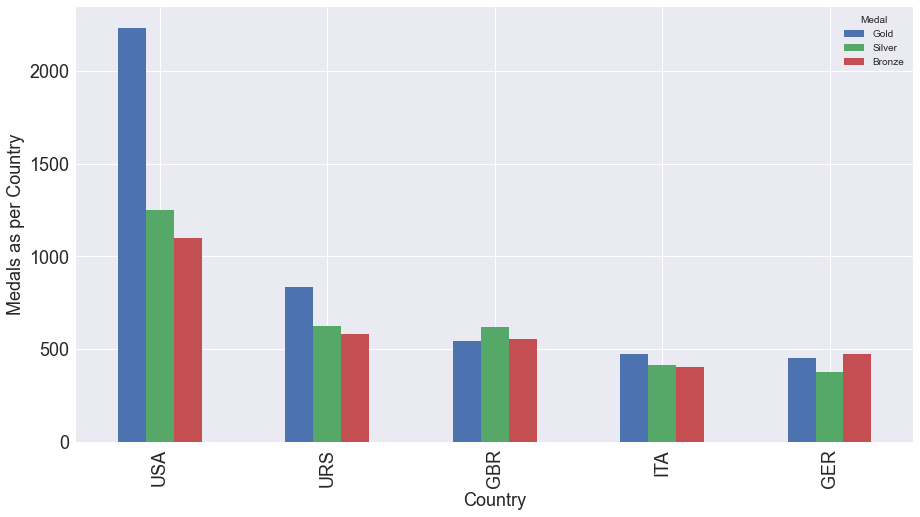

In [159]:
medal_country.head().plot(kind = 'bar', figsize = (15,8), fontsize = 18)
plt.xlabel('Country', fontsize = 18)
plt.ylabel('Medals as per Country', fontsize = 18)
plt.show()

# Stack

In [160]:
medal_country.stack()

Country  Medal 
USA      Gold      2235
         Silver    1252
         Bronze    1098
URS      Gold       838
         Silver     627
                   ... 
AHO      Silver       1
         Bronze       0
KGZ      Gold         0
         Silver       1
         Bronze       2
Length: 441, dtype: int64